In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv("Salary_Data.csv")
x = df["YearsExperience"]
y = df["Salary"]

In [157]:
# computs_cost
def computs_cost(y,w,x,b):
    y_pred = w*x+b
    cost = ((y-y_pred)**2).mean()
    return cost

In [158]:
def Gradient_Function(y,w,x,b):
    w_gradient = (x*(w*x+b -y)).mean()
    b_gradient = (w*x+b -y).mean()
    return w_gradient,b_gradient


In [159]:
def Gradient_Descent(w_init,b_init,count,learning_rate):
    w_hist = [ ]
    b_hist = [ ]
    c_hist = [ ]

    w = w_init
    b = b_init

    for i in range(count):
        w_gradient,b_gradient = Gradient_Function(y,w,x,b)
        w = w - w_gradient*learning_rate
        b = b - b_gradient*learning_rate
        cost = computs_cost(y,w,x,b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if (i%1000 == 0):
            print(f"Interation {i:4} Cost {cost:.2e} W {w:.2e} B {b:.2e} ")
    return w,b,w_hist,b_hist,c_hist


In [160]:
count = 1000
learning_rate = 1.0e-3
w_init = 100
b_init = 0
w_final,b_final,w_hist,b_hist,c_hist = Gradient_Descent(w_init,b_init,count,learning_rate)

Interation    0 Cost 2.30e+05 W 9.72e+01 B -4.16e-01 


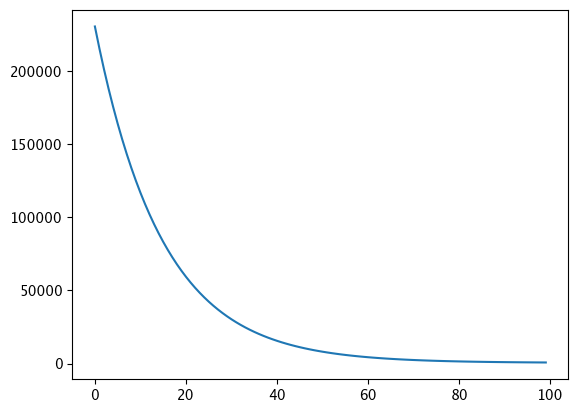

In [161]:
plt.plot(np.arange(100),c_hist[:100])

In [162]:
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))
i = 0
for w in ws:
    j = 0
    for b in bs:
        costs[i,j] = computs_cost(y,w,x,b)
        j+=1
    i+=1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]],
      shape=(201, 201))

In [173]:
count = 10000
learning_rate = 1.0e-3
w_init = -100
b_init = 0
w_final,b_final,w_hist,b_hist,c_hist = Gradient_Descent(w_init,b_init,count,learning_rate)

Interation    0 Cost 3.93e+05 W -9.63e+01 B 5.61e-01 
Interation 1000 Cost 5.31e+01 W 1.04e+01 B 1.93e+01 
Interation 2000 Cost 4.45e+01 W 1.01e+01 B 2.13e+01 
Interation 3000 Cost 3.95e+01 W 9.89e+00 B 2.29e+01 
Interation 4000 Cost 3.66e+01 W 9.71e+00 B 2.41e+01 
Interation 5000 Cost 3.49e+01 W 9.57e+00 B 2.50e+01 
Interation 6000 Cost 3.38e+01 W 9.47e+00 B 2.57e+01 
Interation 7000 Cost 3.32e+01 W 9.39e+00 B 2.63e+01 
Interation 8000 Cost 3.29e+01 W 9.33e+00 B 2.67e+01 
Interation 9000 Cost 3.27e+01 W 9.28e+00 B 2.70e+01 


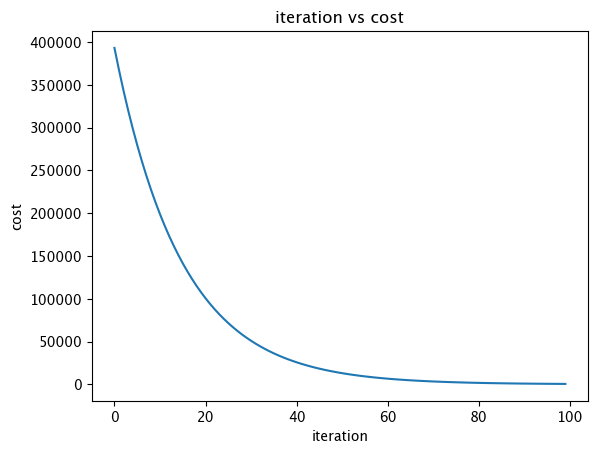

In [174]:
plt.plot(np.arange(0,100),c_hist[:100])
plt.title('iteration vs cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

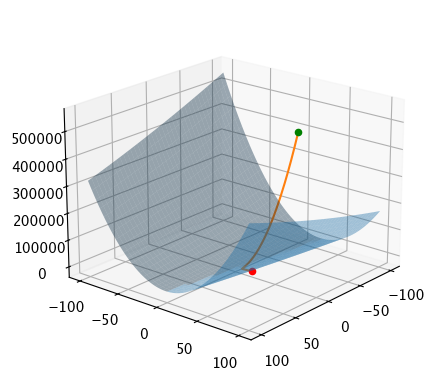

In [175]:
ax = plt.axes(projection="3d")
w_grid,b_grid = np.meshgrid(ws,bs)
ax.view_init(20,40)
ax.plot_surface(w_grid,b_grid,costs,alpha=0.4)
w_index,b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red")
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color="green")
ax.plot(w_hist,b_hist,c_hist)

In [176]:
print(f"{w_final*3.5 + b_final:.1f}")

59.6
